In [7]:
import dask.dataframe as dd

# Load with both rating and discounted_price as object (to avoid dtype errors)
df = dd.read_csv("amazon.csv", dtype={'rating': 'object', 'discounted_price': 'object'})

# Clean discounted_price: remove commas and convert to float
df['discounted_price'] = df['discounted_price'].str.replace(',', '').astype(float)

# Now you can safely use df.head(), describe(), etc.
print("Rows:", len(df))
print("Columns:", len(df.columns))

df.describe().compute()
df.isnull().sum().compute()


Rows: 1465
Columns: 16


product_id              0
product_name            0
category                0
discounted_price       12
actual_price           18
discount_percentage     0
rating                  0
rating_count            2
about_product           0
user_id                 0
user_name               0
review_id               0
review_title            0
review_content          0
img_link                0
product_link            0
dtype: int64

In [8]:
df.head()  # should now work

# Optional: convert 'rating' to numeric after cleaning
df['rating'] = dd.to_numeric(df['rating'], errors='coerce')


In [9]:
# List all columns
df.columns

# Show first 10 rows
df.head(10)

# Check data types
df.dtypes


product_id             string[pyarrow]
product_name           string[pyarrow]
category               string[pyarrow]
discounted_price               float64
actual_price           string[pyarrow]
discount_percentage    string[pyarrow]
rating                           Int64
rating_count           string[pyarrow]
about_product          string[pyarrow]
user_id                string[pyarrow]
user_name              string[pyarrow]
review_id              string[pyarrow]
review_title           string[pyarrow]
review_content         string[pyarrow]
img_link               string[pyarrow]
product_link           string[pyarrow]
dtype: object

In [10]:
df.columns


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [11]:
df['discounted_price'] = dd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = dd.to_numeric(df['actual_price'], errors='coerce')
df['discount_percentage'] = dd.to_numeric(df['discount_percentage'], errors='coerce')
df['rating'] = dd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = dd.to_numeric(df['rating_count'], errors='coerce')


In [12]:
df['discounted_price'] = df['discounted_price'].astype('float64')
df['actual_price'] = df['actual_price'].astype('float64')
df['rating'] = df['rating'].astype('float64')
import dask.dataframe as dd

df['discounted_price'] = dd.to_numeric(df['discounted_price'], errors='coerce').astype('float64')
df['actual_price'] = dd.to_numeric(df['actual_price'], errors='coerce').astype('float64')
df['rating'] = dd.to_numeric(df['rating'], errors='coerce').astype('float64')


In [13]:
df[['discounted_price', 'actual_price', 'rating']].describe().compute()


,discounted_price,actual_price,rating
count,1453.000000,534.000000,1464.000000
mean,3119.354735,637.092360,4.096585
std,6962.761461,280.707759,0.291674
min,0.000000,5.000000,2.000000
25%,309.000000,399.250000,4.000000
50%,799.000000,599.000000,4.100000
75%,1999.000000,899.000000,4.300000
max,77990.000000,999.000000,5.000000


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# Convert a small portion to pandas for visualization
df_sample = df[['discounted_price', 'actual_price', 'rating', 'category']].sample(frac=0.1).compute()


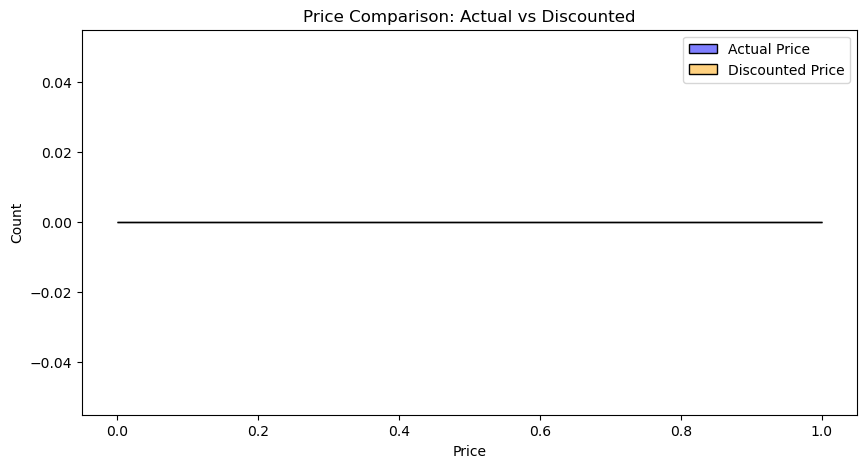

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(df_sample['actual_price'], color='blue', label='Actual Price', kde=True)
sns.histplot(df_sample['discounted_price'], color='orange', label='Discounted Price', kde=True)
plt.legend()
plt.title("Price Comparison: Actual vs Discounted")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


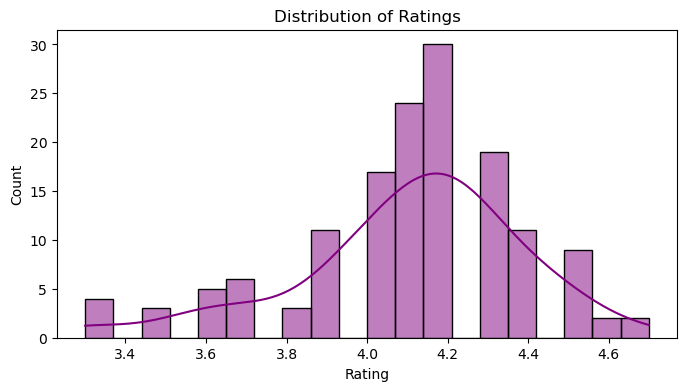

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(df_sample['rating'].dropna(), bins=20, kde=True, color='purple')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


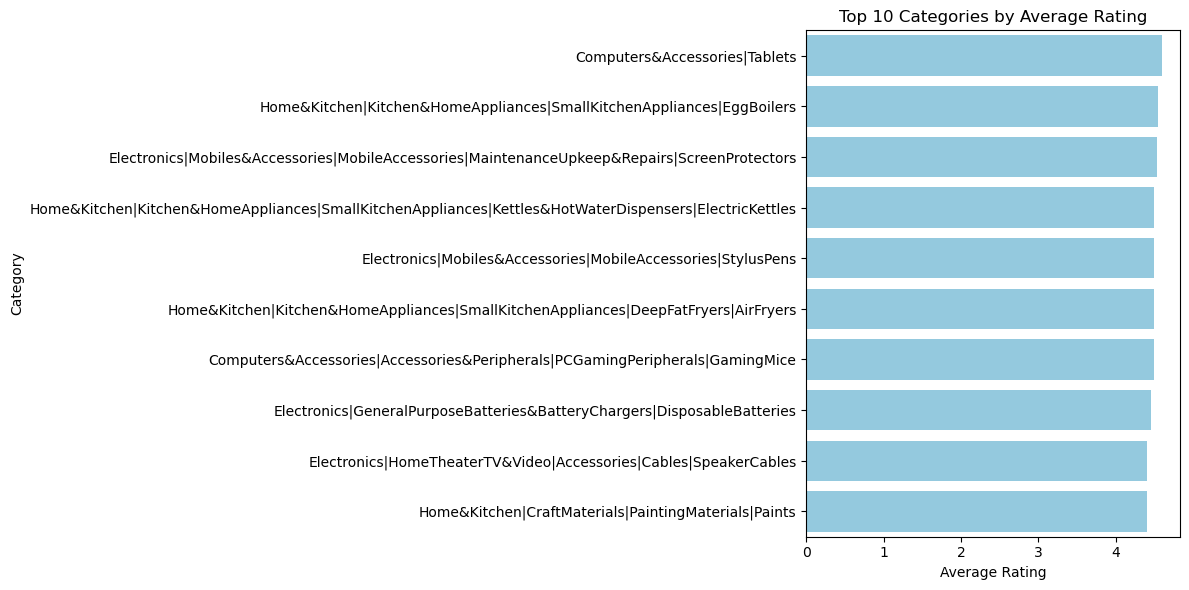

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

# Group and calculate average rating
avg_rating = df_sample.groupby('category')['rating'].mean().sort_values(ascending=False).head(10)

# Plot bar chart
sns.barplot(x=avg_rating.values, y=avg_rating.index, color='skyblue')  # removed palette warning

# Set titles and labels
plt.title("Top 10 Categories by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.tight_layout()
plt.show()



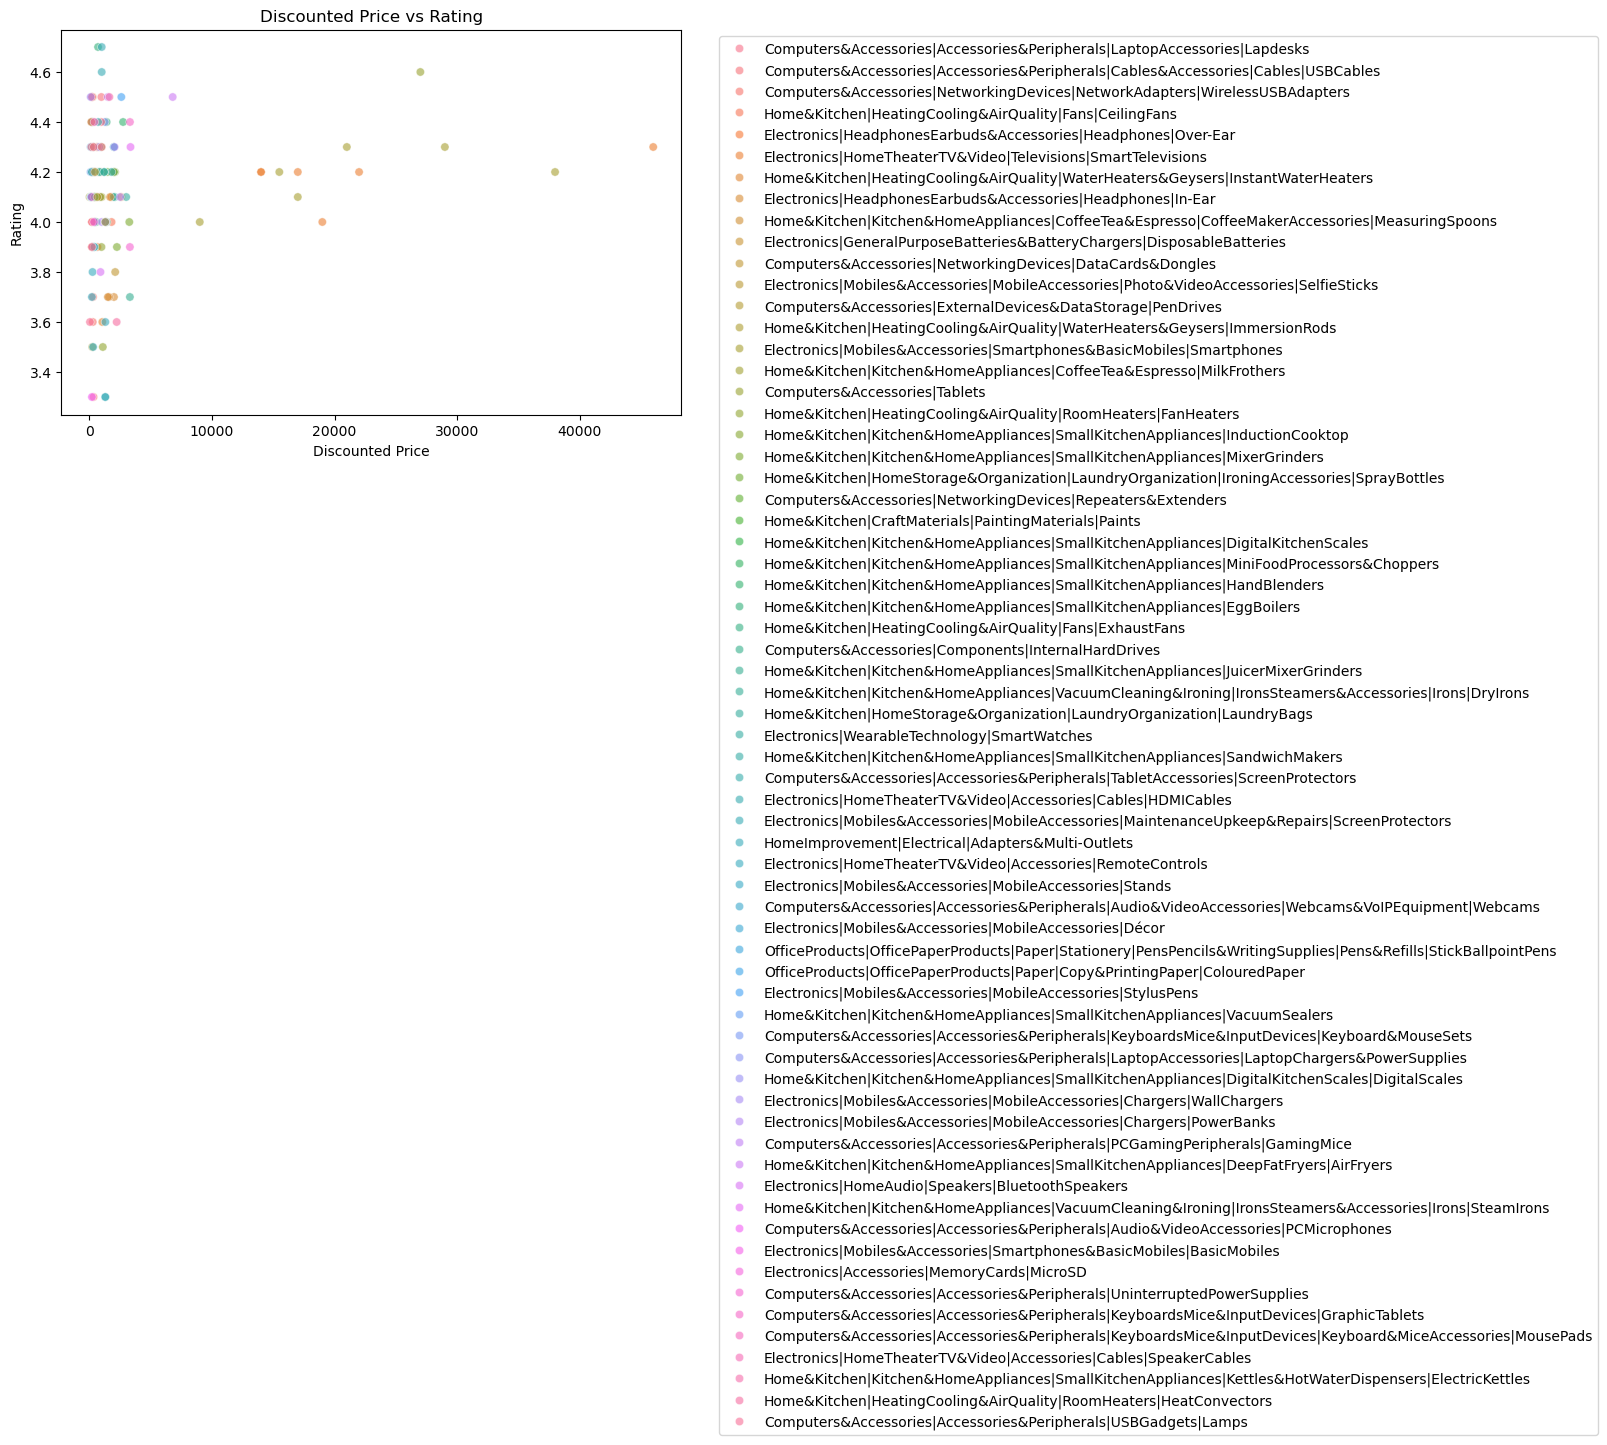

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_sample, x='discounted_price', y='rating', hue='category', alpha=0.6)
plt.title("Discounted Price vs Rating")
plt.xlabel("Discounted Price")
plt.ylabel("Rating")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
